# Import

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Drivers

In [108]:
drivers = pd.read_csv('drivers.csv', encoding = "ISO-8859-1")

# Results

In [109]:
results = pd.read_csv('results.csv', encoding = "ISO-8859-1")

# Races

In [110]:
races = pd.read_csv('races.csv', encoding = "ISO-8859-1")

# Constructors

In [111]:
constructors = pd.read_csv('constructors.csv', encoding = "ISO-8859-1")

# Pre-processing Dataframes

In [112]:
# Merged Constructors, Races, Results, Drivers.
combined1 = pd.merge(results, races, how="left", on="raceId")
combined2 = pd.merge(combined1, drivers, how="left", on="driverId")
combined = pd.merge(combined2, constructors, how="left", on="constructorId")

In [113]:
# Filters the needed columns
filtered = combined[[ "name_y", "year", "name_x", "code",  "position"]]

In [114]:
# Sort Scruderia names, year and Grand Prix names.
grouped = filtered.sort_values(["name_y", "year", "name_x"])

In [116]:
# Choose data from year 2017.
grouped2017 = grouped.loc[filtered['year'] == 2017]

# Processing

In [117]:
dict2017 = {}

### Turn Dataframe into a nested Dictionary

In [118]:
# Create nested Dictionary and keys.
for row in grouped2017.iterrows():
    if row[1]["name_y"] not in dict2017:
        dict2017[row[1]["name_y"]] = {}

    if ("".join(row[1]["code"])) not in dict2017[row[1]["name_y"]]:
        # Remove substitute drivers
        if ("".join(row[1]["code"]) not in ["BUT", "DIR", "GIO", "SAI"]):
            dict2017[row[1]["name_y"]]["".join(row[1]["code"])] = 0

# Remove Toro Rosso because its unstable roster.
dict2017.pop("Toro Rosso")
dict2017
    

{'Ferrari': {'VET': 0, 'RAI': 0},
 'Force India': {'PER': 0, 'OCO': 0},
 'Haas F1 Team': {'GRO': 0, 'MAG': 0},
 'McLaren': {'ALO': 0, 'VAN': 0},
 'Mercedes': {'BOT': 0, 'HAM': 0},
 'Red Bull': {'VER': 0, 'RIC': 0},
 'Renault': {'HUL': 0, 'PAL': 0},
 'Sauber': {'WEH': 0, 'ERI': 0},
 'Williams': {'MAS': 0, 'STR': 0}}

In [119]:
# Move the next row up to the current row for comparison purposes.
grouped2017[["shiftedOrder", "shiftedCode"]] = grouped2017[["position", "code"]].shift(-1)

# Remove every second row that's being copied and moved up.
grouped2017 = grouped2017[::2]

# Remove Toro Rosso records.
grouped2017removedTR = grouped2017.loc[grouped2017["name_y"] != "Toro Rosso"]

# Remove records related to substitute drivers.
removeList = ["BUT", "DIR", "GIO", "SAI"]

grouped2017removedTR = grouped2017removedTR.loc[~grouped2017["code"].isin(removeList)]

finalDataset = grouped2017removedTR.loc[~grouped2017["shiftedCode"].isin(removeList)]

C:\Users\K Weng\AppData\Local\Temp\ipykernel_20156\2871833273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped2017[["shiftedOrder", "shiftedCode"]] = grouped2017[["position", "code"]].shift(-1)
C:\Users\K Weng\AppData\Local\Temp\ipykernel_20156\2871833273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped2017[["shiftedOrder", "shiftedCode"]] = grouped2017[["position", "code"]].shift(-1)


In [120]:
# Fill in the nested dictionary
for row in finalDataset.iterrows():
    # If the current driver is higher place than his teammate, add 1 to the current driver.
    if (row[1]["position"] < row[1]["shiftedOrder"]):
        dict2017[row[1]["name_y"]][row[1]["code"]] += 1
    # If the current driver is lower place than his teammate, add 1 to the teammate.
    else:
        dict2017[row[1]["name_y"]][row[1]["shiftedCode"]] += 1

dict2017

{'Ferrari': {'VET': 15, 'RAI': 5},
 'Force India': {'PER': 12, 'OCO': 8},
 'Haas F1 Team': {'GRO': 9, 'MAG': 11},
 'McLaren': {'ALO': 12, 'VAN': 7},
 'Mercedes': {'BOT': 9, 'HAM': 11},
 'Red Bull': {'VER': 12, 'RIC': 8},
 'Renault': {'HUL': 8, 'PAL': 8},
 'Sauber': {'WEH': 10, 'ERI': 8},
 'Williams': {'MAS': 11, 'STR': 8}}

# Transform dictionary into lists

In [121]:
teamNames = []
firstDriver = []
firstDriverTimes = []
secondDriver = []
secondDriverTimes = []

for scuderia, drivers in dict2017.items():
    teamNames.append(scuderia)

    counter = 0
    for driver in drivers.items():
        if (counter % 2 == 0):
            firstDriver.append(driver[0])
            firstDriverTimes.append(driver[1])
        else:
            secondDriver.append(driver[0])
            secondDriverTimes.append(driver[1])
        counter += 1

print(teamNames)
print(firstDriver)
print(firstDriverTimes)
print(secondDriver)
print(secondDriverTimes)
        

['Ferrari', 'Force India', 'Haas F1 Team', 'McLaren', 'Mercedes', 'Red Bull', 'Renault', 'Sauber', 'Williams']
['VET', 'PER', 'GRO', 'ALO', 'BOT', 'VER', 'HUL', 'WEH', 'MAS']
[15, 12, 9, 12, 9, 12, 8, 10, 11]
['RAI', 'OCO', 'MAG', 'VAN', 'HAM', 'RIC', 'PAL', 'ERI', 'STR']
[5, 8, 11, 7, 11, 8, 8, 8, 8]


# Feed the lists and plot them

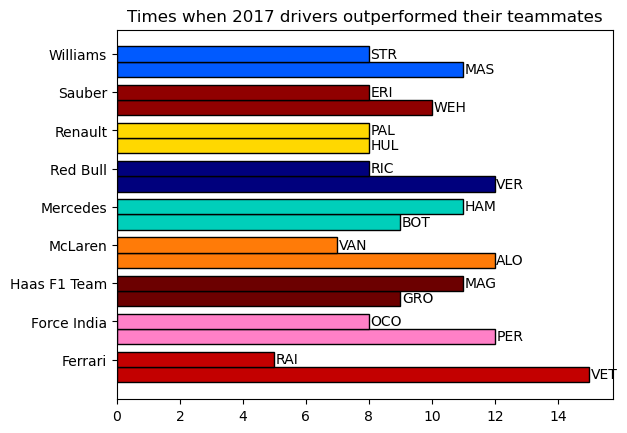

In [125]:
ind = np.arange(len(teamNames))
width = 0.4

# Color for each scuderia
color = ["#C30000", "#FF80C7", "#6C0000", "#FF7B08", "#00CFBA", "#00007D", "#FFD800", "#900000", "#005AFF"]

fig, ax = plt.subplots()
# Set title
ax.set_title("Times when 2017 drivers outperformed their teammates")

# Plot bars
rect1 = ax.barh(ind, firstDriverTimes, width, color= color, edgecolor = "black")
rect2 = ax.barh(ind+width, secondDriverTimes, width, color= color, edgecolor = "black")

# Plot bar labels
ax.bar_label(rect1, labels=firstDriver, padding=1, label_type="edge")
ax.bar_label(rect2, labels=secondDriver, padding=1, label_type="edge")

ax.set(yticks=ind + width, yticklabels=teamNames)

plt.show()
